# K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters, as well as a set of cluster centers{µk}, such that the sum of the squares of the distances of each data point to its closest cluster center µk, is a minimum.

In [177]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from random import randrange

### Dataset Preparation

In [180]:
X, Y = make_blobs(n_features=2, n_samples=500, centers=5)

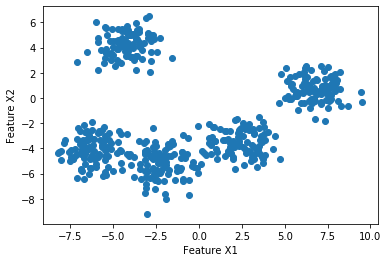

In [181]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.show()

### Implementation

In [182]:
## Preparing the initial cluster centers 

K = 5 ## No.of clusters is Known to us here

clusters = {}

color = ['green', 'blue', 'red', 'yellow', 'pink']  ## Colors to assign to every cluster

for i in range(K):
    
    ## Assign random cluster center
    uk = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    clusters[i] = {
        'center': uk,
        'points': points,
        'color': color[i]
    }

In [183]:
print(clusters)

{0: {'center': array([-5.08972281, -9.2503317 ]), 'points': [], 'color': 'green'}, 1: {'center': array([-8.46872127,  2.44301204]), 'points': [], 'color': 'blue'}, 2: {'center': array([-7.55928665, -7.0830939 ]), 'points': [], 'color': 'red'}, 3: {'center': array([-7.22286428,  3.79551175]), 'points': [], 'color': 'yellow'}, 4: {'center': array([5.48548728, 3.10966287]), 'points': [], 'color': 'pink'}}


In [184]:
def distance(x1, x2):
    '''Calculates the euclidean distance between points x1 and x2'''
    return np.sqrt(np.sum((x1-x2)**2))

def assignPointsToClusters(clusters, X, K):
    '''Assigns each data point to it's nearest cluster center -> E-step'''
    
    no_of_points = X.shape[0]
    
    for ix in range(no_of_points):
        distances = []
        
        for c in range(K):
            dist = distance(X[ix], clusters[c]['center'])
            distances.append(dist)
        
        assigned_cluster = np.argmin(distances)
        clusters[assigned_cluster]['points'].append(X[ix])
        
def updateClusterCenters(clusters, X, K):
    '''Updates each cluster center based on the mean of the points assigned to the cluster -> M-Step'''
    
    for kx in range(K):
        points = np.array(clusters[kx]['points'])
        
        ## If the cluster has some non-zero points assigned to it
        if points.shape[0]>0:
            clusters[kx]['center'] = points.mean(axis=0)  ## Update cluster center
            clusters[kx]['points'] = []                   ## Clear the points associated with the cluster
            
def plotCluster(clusters, X, K, step):
    '''Plot the clusters with respective color labels'''
    
    for kx in range(K):
        points = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(points[:,0], points[:,1], c=clusters[kx]['color'])
        except:
            pass
        
        ## Plot the Cluster Center in Black
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], c='black', marker='*', s=100)
    step = "Step"+" "+str(step)
    plt.title(step)
    plt.show()

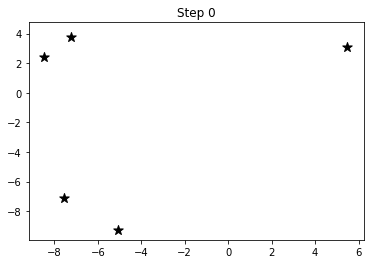

In [185]:
plotCluster(clusters, X, K, 0)

In [186]:
def repeatSteps(clusters, X, K, maxIter=10):
    '''Repeat the E-Step and M-Step until convergence'''
    
    for i in range(maxIter):
        assignPointsToClusters(clusters, X, K)  ## E-Step
        plotCluster(clusters, X, K, i+1)
        updateClusterCenters(clusters, X, K)    ## M-Step

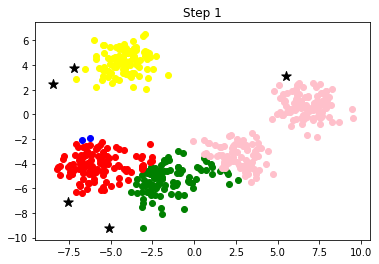

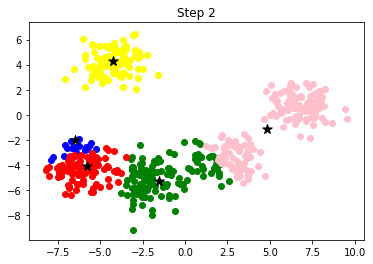

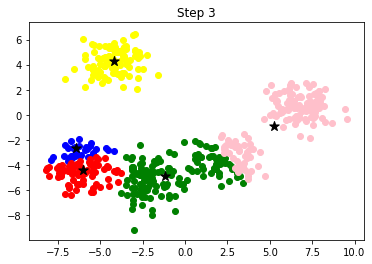

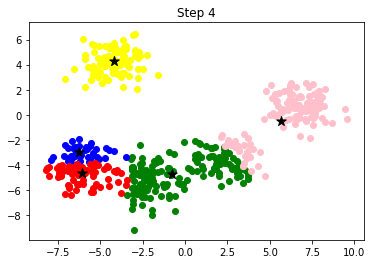

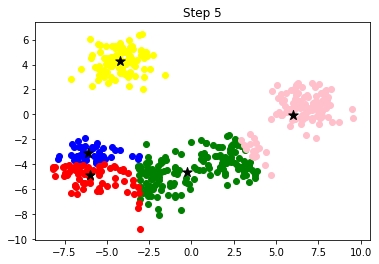

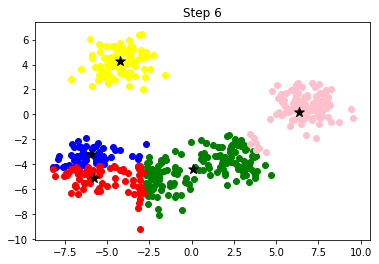

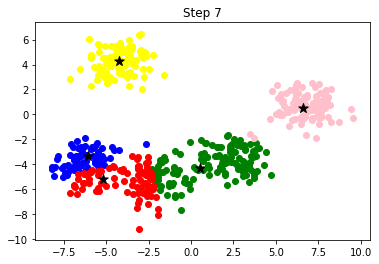

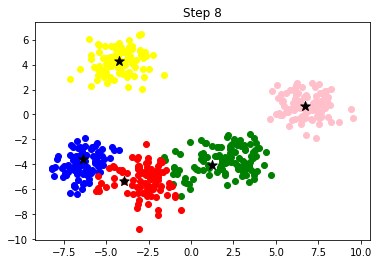

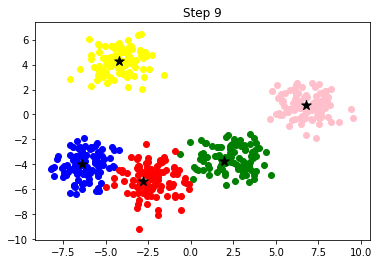

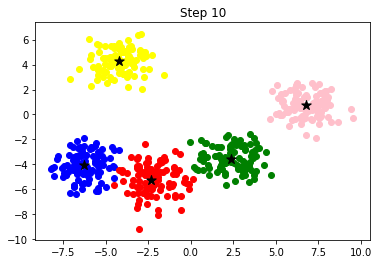

In [187]:
repeatSteps(clusters, X, K)

# K-Means++

* K-Means is quite sensitive to initalization, if the initialization is not good, our algorithm is not able to make desired number of clusters.

* To overcome this problem, we use technique called **K-Means++** which chooses initial centers so that they are statiscallly close to final ones.

* **Intuition** - Pick the centroids that are far away from one another. This increases the chances of initially picking up centroids that lie in different cluster centers. As centroids are picked from data points, each centroid has at least some data points associated with it at the end. 

* **Note** - Initialization is computationally more expensive in K-Means++ than the standard K-Means but the run-time for convergence to optimum is drastically reduced for K-Means++

### Implementation

In [188]:
## Preparing the initial cluster centers 

K = 5 ## No.of clusters is Known to us here

clusters_ = {}

color_ = ['green', 'blue', 'red', 'yellow', 'pink']  ## Colors to assign to every cluster

centroids = []    

## Pick 1st centroid randomly from the data points
centroid_init = randrange(X.shape[0])
centroid = X[centroid_init]
centroids.append(centroid)

for kx in range(K-1):
    distances = []
    
    for i in range(X.shape[0]):
        min_dist = distance(X[i], centroids[0])
        
        for cx in range(len(centroids)):
            dist = distance(X[i], centroids[cx])
            
            ## Get distance from the nearest, previously chosen centroid
            if dist<min_dist:
                min_dist = dist
                
        distances.append(min_dist)
        
    ## Point having maximum distance from the nearest, previously chosen centroid is selected as the next centroid    
    centroids.append(X[np.argmax(distances)])
    
centroids = np.array(centroids)

for i in range(K):
    
    ## Assign random cluster center
    uk = centroids[i]
    points = []
    
    clusters_[i] = {
        'center': uk,
        'points': points,
        'color': color_[i]
    }

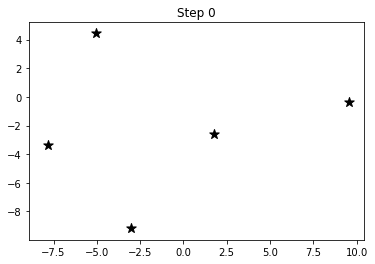

In [189]:
plotCluster(clusters_, X, K, 0)

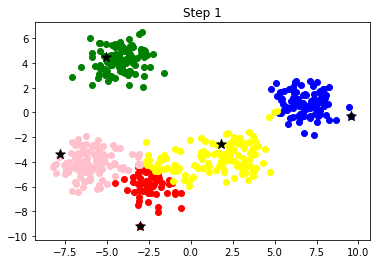

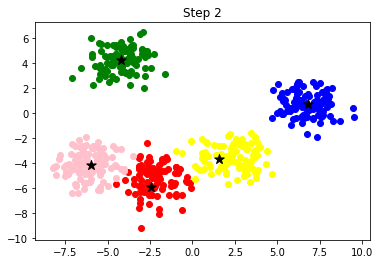

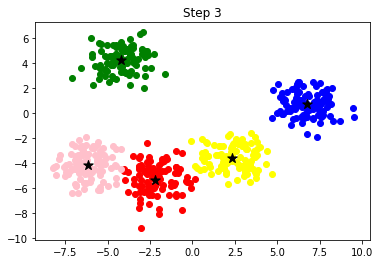

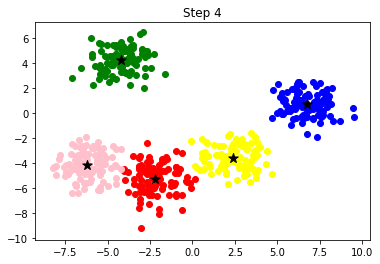

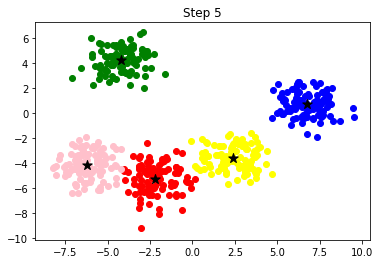

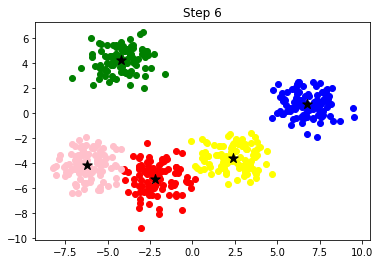

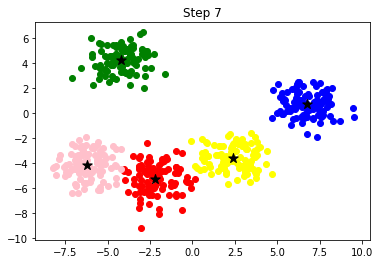

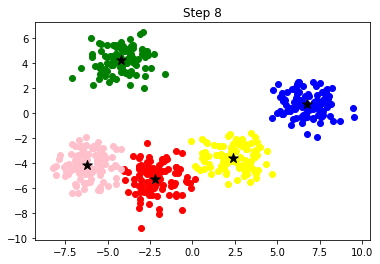

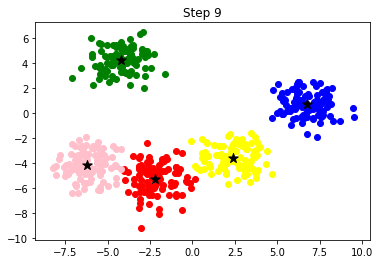

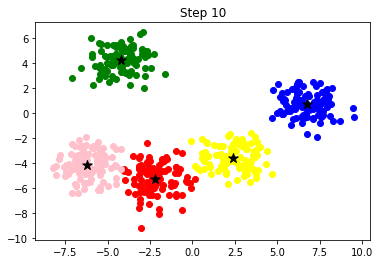

In [190]:
repeatSteps(clusters_, X, K)

### We can see that K-Means++ converges in lesser iterations/steps as compared to the standard K-Means algorithm!!